<div class="alert alert-block alert-info">
    <img style="float: right;" src="./material/OSE.svg" width="50">
    <u><h1>The Career Decisions of Young Men</h1></u>
</div>

This notebook processes and explores the estimation sample used by Michael Keane and Kenneth Wolpin to study the career decisions of young men. 

> Keane, M. P. and Wolpin, K. I. (1997). [The career decisions of young men](http://www.journals.uchicago.edu/doi/10.1086/262080). *Journal of Political Economy*, 105(3), 473-522.

The sample is based on the [National Longitudinal Survey of Youth 1979 (NLSY79)](https://www.bls.gov/nls/nlsy79.htm) which is available to download [here](https://github.com/structDataset/career_decisions_data/blob/master/KW_97.raw). 

<div class="alert alert-block alert-info">
    <h3>Preparations</h3>
</div>

We first peform some basic preparations to ease further processing.

In [1]:
import pandas as pd
import numpy as np

from analysis_career_decisions_data import get_working_experience
from analysis_career_decisions_data import get_choices
from analysis_career_decisions_data import get_initial_schooling
from analysis_career_decisions_data import construct_activity_count
from analysis_career_decisions_data import make_transition_matrix
from analysis_career_decisions_data import get_initial_schooling_activity

from plot_career_decisions_data import plot_sample_size
from plot_career_decisions_data import plot_initial_schooling
from plot_career_decisions_data import plot_decisions_by_age
from plot_career_decisions_data import plot_transition_heatmap
from plot_career_decisions_data import plot_wage_moments

from IPython.display import display_html

In [2]:
def display_side_by_side(*args):
    html_str = ""
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace("table", 'table style="display:inline"'), raw=True)

In [3]:
# Proper formatting of the wage variable.
pd.options.display.float_format = "{:,.2f}".format

# Label and format columns
columns = ["Identifier", "Age", "schooling_experience", "Choice", "Wage"]
dtype = {
    "Identifier": np.int,
    "Age": np.int64,
    "schooling_experience": np.int,
    "Choice": "category",
}

# Read the original data file
df = pd.DataFrame(np.genfromtxt("KW_97.raw"), columns=columns).astype(dtype)

In [4]:
# Labeling different choice categories, introduction period, setting index
df["Choice"] = df["Choice"].map(
    {1.0: "schooling", 2.0: "home", 3.0: "white_collar", 4.0: "blue_collar", 5.0: "military"}
)
df["Period"] = df["Age"] - 16
df.set_index(["Identifier", "Period"], inplace=True, drop=True)

In [5]:
df = df.groupby("Identifier").apply(lambda x: get_working_experience(x))

<div class="alert alert-block alert-info">
    <h3>Basic Structure</h3>
</div>



First we explore the basic structure of the dataset. All individuals enter the model initially at the same age and are then observed for a varying number of consecutive years. Each year, the individual's decision to work in either a white or blue collar occupation, attend school, enroll in the miliary, or remain at home is recorded. If working, the dataset potentially also contains that year's wage as a full-time equivalent.

In [6]:
df.head(15)

Age  schooling_experience        Choice      Wage  \
Identifier Period                                                      
6          0        16                    11     schooling       nan   
           1        17                    12     schooling       nan   
           2        18                    13     schooling       nan   
           3        19                    14     schooling       nan   
           4        20                    15     schooling       nan   
           5        21                    16          home       nan   
           6        22                    16  white_collar 14,062.67   
           7        23                    16  white_collar 15,921.17   
           8        24                    16  white_collar 18,602.73   
           9        25                    16  white_collar 19,693.95   
           10       26                    16  white_collar 20,611.00   
7          0        16                    10     schooling       nan   
           1        17                    11     schooling       nan   
           2        18                    12   blue_collar 18,795.29   
           3        19                    12      military  9,647.86   

                   blue_collar_experience  white_collar_experience  \
Identifier Period                                                    
6          0                          nan                      nan   
           1                         0.00                     0.00   
           2                         0.00                     0.00   
           3                         0.00                     0.00   
           4                         0.00                     0.00   
           5                         0.00                     0.00   
           6                         0.00                     0.00   
           7                         0.00                     1.00   
           8                         0.00                     2.00   
           9                         0.00                     3.00   
           10                        0.00                     4.00   
7          0                          nan                      nan   
           1                         0.00                     0.00   
           2                         0.00                     0.00   
           3                         1.00                     0.00   

                   military_experience  
Identifier Period                       
6          0                       nan  
           1                      0.00  
           2                      0.00  
           3                      0.00  
           4                      0.00  
           5                      0.00  
           6                      0.00  
           7                      0.00  
           8                      0.00  
           9                      0.00  
           10                     0.00  
7          0                       nan  
           1                      0.00  
           2                      0.00  
           3                      0.00

The figure below illustrates the decision tree in the model. In each period, individual can decide anew to either work in the labor market, go to school, or simply stay at home.

![title](material/fig-decision-tree.png)

We start it with more than 1,300 observations at age 16, but then end up with less than 300 for age 26.

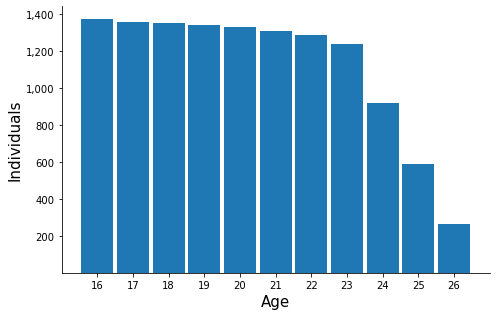

In [7]:
plot_sample_size(df)

<div class="alert alert-block alert-info">
    <h3>Basic Descriptives</h3>
</div>

Now we are ready to reproduce some descriptive statistics from the paper.

### Choices
---

We reproduce the distribution of individuals across the different alternatives as reported in Tabel 1.

In [8]:
display_side_by_side(get_choices(df)["total"], get_choices(df)["share"])

,Blue,White,Military,Schooling,Home,All
Age,,,,,,
16,45,4,1,1178,145,1373
17,113,15,20,1014,197,1359
18,331,92,70,561,296,1350
19,406,115,107,420,293,1341
20,454,149,113,341,273,1330
21,498,170,106,275,257,1306
22,559,256,90,169,212,1286
23,546,336,68,105,185,1240
24,416,284,44,65,112,921


 A more visually appealing version is presented below.

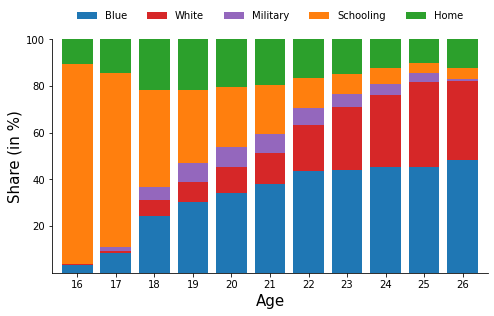

In [9]:
plot_decisions_by_age(df)

### Wages
---

We reproduce the average real wages by occupation.

In [10]:
average_wages = pd.crosstab(
    index=df["Age"], columns=df["Choice"], values=df["Wage"], aggfunc="mean", margins=True,
)

average_wages.columns = [label.split("_")[0].capitalize() for label in list(average_wages.keys())]

average_wages

,White,Blue,Military,All
Age,,,,
16,"9,320.76","10,286.74",nan,"10,217.74"
17,"10,049.76","11,572.89","9,005.36","11,036.60"
18,"11,775.34","12,603.82","10,171.87","12,060.75"
19,"12,376.42","12,949.84","9,714.60","12,246.68"
20,"13,824.01","14,363.66","10,852.51","13,635.87"
21,"15,578.14","15,313.45","12,619.37","14,977.00"
22,"20,236.08","16,947.90","13,771.56","17,561.28"
23,"20,745.56","17,884.95","14,868.65","18,719.84"
24,"24,066.64","19,245.19","15,910.84","20,942.42"


We show average wages and their standard devision in the figures below. For a clean illustration we use a savgol filter. 

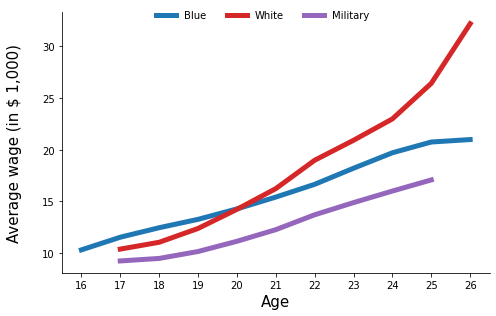

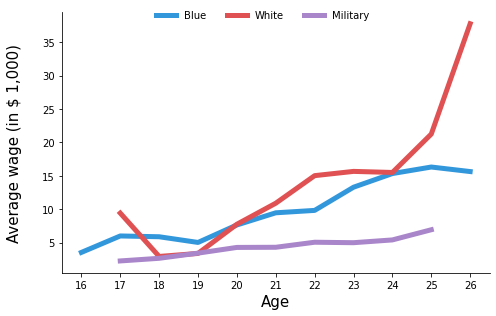

In [11]:
plot_wage_moments(df, savgol=True)

### Initial Schooling
---

We illustrate the initial years of schooling the individuals enter the model.

In [12]:
# Reformat as dataframe
df_initial_schooling = pd.DataFrame.from_dict(get_initial_schooling(df))
df_initial_schooling.columns = [
    label.capitalize() for label in list(get_initial_schooling(df).keys())
]
df_initial_schooling.set_index("Years")

,Number,Frequency
Years,,
7,13,0.01
8,58,0.04
9,277,0.20
10,922,0.67
11,103,0.08


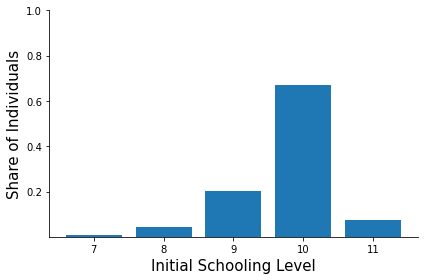

In [13]:
plot_initial_schooling(get_initial_schooling(df))

In [22]:
get_initial_schooling_activity(df)

,7,8,9,10,11
Blue,4.15,4.18,4.06,3.15,3.19
White,0.10,0.27,0.54,1.03,1.21
Military,0.02,0.11,0.35,0.51,0.68
School,0.12,0.29,1.00,2.35,2.56
Home,5.00,4.50,3.21,2.11,1.58
Total,9.39,9.36,9.17,9.16,9.23


### Transition Matrix
---

We will illustrate two directions of transition probabilities:
- `origin_to_destination`  
Percentage of individuals who are in an originating alternative in $t$ (column) and will be in a destination alternative in $t+1$ (row). 
    * *Example 1:* 64% of the time, an individual who is in school currently, will be in the school the next year.   
    * *Example 2:* 10% of the time, an individual who is in a blue-collar occupation currently, will be in a white-collar occupation next year.   


- `destination_from_origin`   
Percentage of individual who are in a destinating alternative in $t$ (column) and were in a certain originating alternative in $t-1$ (row).
    * *Example 1:* 87% of the time, an individual who is in school at $t$ was also in school in $t-1$.
    * *Example 1:* 18% of the time, an individual who is employed in a white-collar occupation at $t$ worked in a blue-collar occupation in $t-1$.
   

In [17]:
tm_od = make_transition_matrix(df)["origin_to_destination"]
tm_od.columns, tm_od.index = (
    [label.split("_")[0].capitalize() for label in list(tm_od.columns)],
    [label.split("_")[0].capitalize() for label in list(tm_od.index)],
)
tm_od

,Blue,White,Military,Schooling,Home
Blue,0.73,0.10,0.01,0.03,0.12
White,0.20,0.67,0.01,0.06,0.06
Military,0.10,0.03,0.80,0.01,0.06
Schooling,0.12,0.09,0.02,0.64,0.13
Home,0.31,0.08,0.04,0.10,0.47


In [18]:
tm_do = make_transition_matrix(df)["destination_from_origin"]
tm_do.columns, tm_do.index = (
    [label.split("_")[0].capitalize() for label in list(tm_do.columns)],
    [label.split("_")[0].capitalize() for label in list(tm_do.index)],
)
tm_do

,Blue,White,Military,Schooling,Home
Blue,0.62,0.07,0.02,0.13,0.16
White,0.18,0.52,0.01,0.20,0.09
Military,0.04,0.01,0.73,0.11,0.11
Schooling,0.04,0.03,0.00,0.87,0.06
Home,0.20,0.04,0.02,0.27,0.46


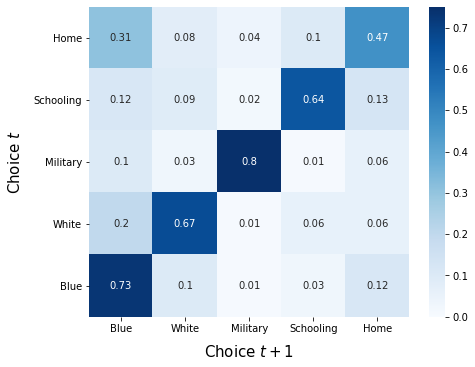

In [19]:
plot_transition_heatmap(make_transition_matrix(df))